# install and steup

In [ ]:
!pip -q install saspy

In [2]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}


Writing sascfg_personal.py


# sign in to SAS Studio

In [4]:
import saspy
sas_session = saspy.SASsession()
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 356



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/sascfg_personal.py
WORK Path             = /saswork/SAS_work965500000AC7_odaws02-usw2.oda.sas.com/SAS_work316F00000AC7_odaws02-usw2.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 5.4.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 2759


# import data

In [ ]:
c = sas_session.submitLST("""
PROC IMPORT DATAFILE="/home/u63687698/Data_Canada_complete.tsv"
    OUT=work.mydata
    DBMS=TAB REPLACE;
    DELIMITER='09'x;
    GETNAMES=YES;
RUN;
""")

In [ ]:
sas_session.submitLST("""
PROC PRINT DATA=work.mydata(obs=10);
RUN;
""")

# The incidence rate of respiratory viruses is centered around the holidays




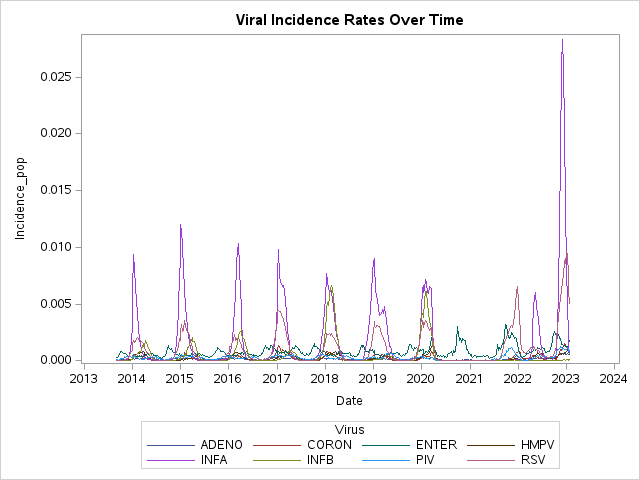

In [64]:
sas_session.submitLST("""
TITLE 'Viral Incidence Rates Over Time';
PROC SGPLOT DATA=work.mydata;
    SERIES x=date y=Incidence_pop / GROUP=Virus;
RUN;
QUIT
""")

- `ADENO`: adeno virus
- `CORON`: human coronaviruses
- `ENTERORHINO`: entero rhinovirus
- `HMPV`: human metapneumovirus
-`INFA`: influenza A
-`INFB`: influenza B
-`RSV`: respiratory syncitial virus
-`PIV`: parainfluenzavirus.

In [76]:
sas_session.submitLST("""
SYMBOL1 V=plus   C=black   I=None;
SYMBOL2 V=plus   C=blue   I=None;
SYMBOL3 V=plus   C=purple   I=None;
SYMBOL4 V=plus   C=pink   I=None;
SYMBOL5 V=plus   C=orange   I=None;
SYMBOL6 V=plus   C=red   I=None;
SYMBOL7 V=plus   C=green   I=None;
SYMBOL8 V=plus   C=grey   I=None;

TITLE 'Viral Incidence Rates vs Temperature';
PROC GPLOT DATA=work.mydata;
    PLOT Incidence_pop*T_WAv=Virus;
RUN;
QUIT
""")

In [78]:
sas_session.submitLST("""
SYMBOL1 V=plus   C=black   I=None;
SYMBOL2 V=plus   C=blue   I=None;
SYMBOL3 V=plus   C=purple   I=None;
SYMBOL4 V=plus   C=pink   I=None;
SYMBOL5 V=plus   C=orange   I=None;
SYMBOL6 V=plus   C=red   I=None;
SYMBOL7 V=plus   C=green   I=None;
SYMBOL8 V=plus   C=grey   I=None;

TITLE 'Viral Incidence Rates vs Absolute Humidity';
PROC GPLOT DATA=work.mydata;
    PLOT Incidence_pop*AH_WAv=Virus;
RUN;
QUIT
""")